# Network introduction
Main parts of the course:
1. networks definitions and network measures
2. networks in time  
3. networks from data

This notebook was inspired from:
* Big data course from 2019 Marc and Liubov https://github.com/Big-data-course-CRI/materials_big_data_cri_2019
* Bruno Gonçalves / Data4Sci: https://github.com/DataForScience/Networks
* Michael Szell data course https://github.com/mszell



# Network libraries

If we want to use the network theory calculation in python, it is easier to load a library.

https://networkx.org/

If you use this library, you do not need to deal with all the classes encoding of network structures yourself.


# Structure of the notebook
1. First we add and encode networks ourselves NOT using precoded class of networks (see previous notebook)
2. We can use networkx class for network object (see below cells).

In [ ]:
# loading standard libraries
from collections import Counter
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt

# Networks generation: using NetworkX library for networks

## Networks from inserted nodes

We will use networkx tutorial for this

https://networkx.org/documentation/stable/tutorial.html

(insert and execute your code here below)

In [ ]:
import networkx as nx

# start an empty network (precoded object)

G = nx.Graph()


# adding nodes

G.add_node(1)


# adding edges G can also be grown by adding one edge at a time,

G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

# or we can be adding a list of edges,

G.add_edges_from([(1, 2), (1, 3)])


# What about possible conflicts by adding more edges?
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')


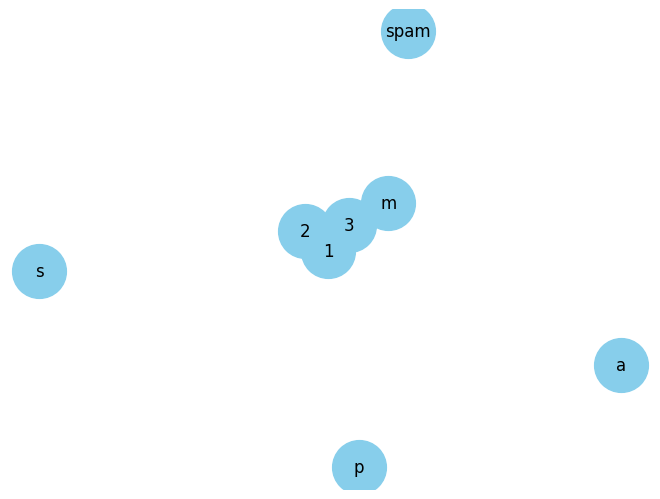

In [ ]:


# calculate number of edges

# try to draw a graph with different layouts, use networkx search for this
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos=nx.spring_layout(G))
plt.show()



In [ ]:
# try to change node attributes




## Networks from precoded types

How can we generate networks, which are general enough?
Using network classes of
1. deterministic
2. random networks


## Classes of networks
Networkx classes
https://networkx.github.io/documentation/stable/reference/generators.html

Other pre-assigned network classes return:

1. balanced_tree(r, h[, create_using]), the perfectly balanced r-ary tree of height h.
2. barbell_graph(m1, m2[, create_using]), the Barbell Graph: two complete graphs connected by a path.
3. binomial_tree(n), the Binomial Tree of order n.
4. complete_graph(n[, create_using]), the complete graph K_n with n nodes.
5. complete_multipartite_graph(*subset_sizes), the complete multipartite graph with the specified subset sizes.
6. circular_ladder_graph(n[, create_using]), the circular ladder graph \(CL_n\) of length n.
7. circulant_graph(n, offsets[, create_using]), the circulant graph \(Ci_n(x_1, x_2, ..., x_m)\) with \(n\) vertices.
8. cycle_graph(n[, create_using]), the cycle graph \(C_n\) of cyclically connected nodes.
9. dorogovtsev_goltsev_mendes_graph(n[, …]), the hierarchically constructed Dorogovtsev-Goltsev-Mendes graph.
10. empty_graph([n, create_using, default]), the empty graph with n nodes and zero edges.
11. full_rary_tree(r, n[, create_using]), a full r-ary tree of n vertices.
12. ladder_graph(n[, create_using]), the Ladder graph of length n.
13. lollipop_graph(m, n[, create_using]), the Lollipop Graph; K_m connected to P_n.
14. path_graph(n[, create_using]),  the Path graph P_n of linearly connected nodes.
15. star_graph(n[, create_using]), the star graph
16. trivial_graph([create_using]), the Trivial graph with one node (with label 0) and no edges.
17. turan_graph(n, r), the Turan Graph
18. wheel_graph(n[, create_using]), the wheel graph



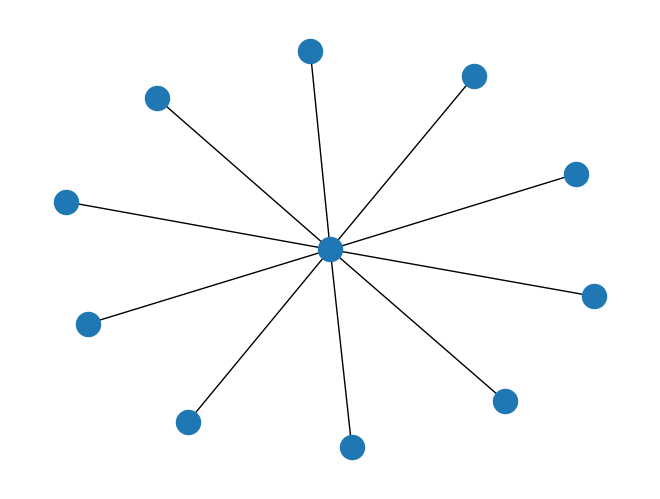

In [ ]:
import networkx as nx
# 1. Generate a network
N=10
Gs = nx.star_graph(N)


# 2. Draw using the preassigned layout
nx.draw(Gs)



## 1. Network measures

Centrality measures for a given network are described in https://en.wikipedia.org/wiki/Centrality

Examples of possible local measures:
1. `degree_centrality(G)`, the degree centrality for nodes.
2. `in_degree_centrality(G)`, the in-degree centrality for nodes.
3. `out_degree_centrality(G)`, the out-degree centrality for nodes
4. `betweenness_centrality(G)`, the shortest-path betweenness centrality for nodes. Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through
5. ` closeness_centrality(G)`, closeness centrality for nodes.  Closeness centrality  of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes
6. `eigenvector_centrality(G)`,  the eigenvector centrality for the graph G. Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i is $x$: $Ax = \lambda x$, where $\lambda$ is eigenvalue.

Other network measures are described in the networkx documentation https://networkx.github.io/documentation/stable/reference/generators.html

## Example

<class 'dict'>
<class 'networkx.classes.reportviews.DegreeView'>
<class 'networkx.classes.reportviews.DegreeView'>
degree distribution
[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13]


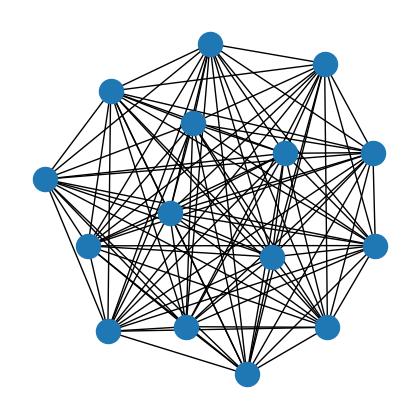

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Generate a network
n=10
G = nx.star_graph(n)

n = 15  #number of nodes
k = 2
p = 0.99  #probability of connecting any two nodes

Gws = nx.watts_strogatz_graph(n, k, p)

G = nx.erdos_renyi_graph(n, p)

# 2. Calculate measures for each node
deg = nx.degree_centrality(G) # gives a dictionary!!!
print(type(deg))
print(type(G.degree()))
print(type(G.degree))# gives 'networkx.classes.reportviews.DegreeView'
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # gives array of degree values

print('degree distribution')
print(degree_sequence)


# 3. Draw network with node colors defined by degree
plt.figure(figsize = (4, 4)) # set size of figure

# Be careful to associate node_color with degree value of the same node!!
node_color = degree_sequence # assign node colors
nx.draw(G) #  node_color = degree_sequence)


# let us also try different layouts



Let us also plot the distribution od network measures.



In [ ]:
deg = nx.degree_centrality(G) # gives a dictionary!!!
print(type(deg))
print(type(G.degree()))
print(type(G.degree))# gives 'networkx.classes.reportviews.DegreeView'
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # gives array of degree values

print('degree distribution')
print(degree_sequence)


<class 'dict'>
<class 'networkx.classes.reportviews.DegreeView'>
<class 'networkx.classes.reportviews.DegreeView'>
degree distribution
[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13]




## How to analyze any network?
Try to plot network measures for your favorite network.

#### Test excercise
1. For a network of your choice try to find network measure which is meaningful.
2. Visualise network measures for a network of your choise.

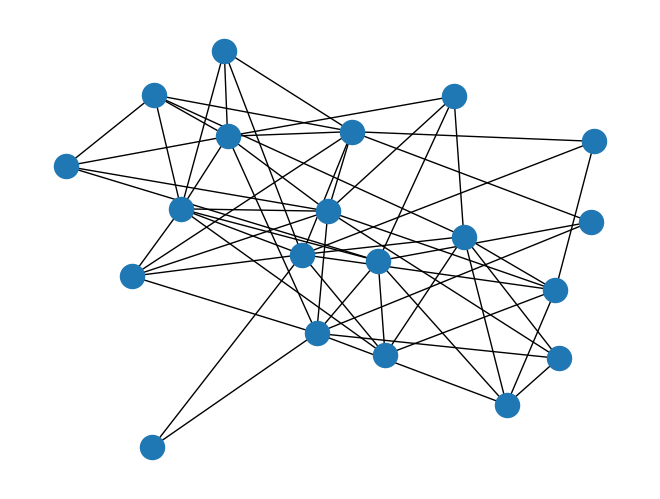

In [ ]:
import networkx as nx

# random network of Erdos-Renyi
G_er = nx.erdos_renyi_graph(20, 0.3)

nx.draw(G_er)


In [ ]:
# Now it is your turn

<class 'dict_values'>
{0: 0.007759784075573549, 1: 0.03644712986818249, 2: 0.019710601289548657, 3: 0.02036219141482299, 4: 0.04698332856227592, 5: 0.06952725636936163, 6: 0.11434316171158274, 7: 0.052705871126923744, 8: 0.08277239329870908, 9: 0.005847953216374269, 10: 0.030130590656906445, 11: 0.013727695306642675, 12: 0.0854499788710315, 13: 0.053006447743289845, 14: 0.08836577652367125, 15: 0.031678798784061935, 16: 0.044376968061178586, 17: 0.021890292942924522, 18: 0.0011695906432748538, 19: 0.015849452691557953}


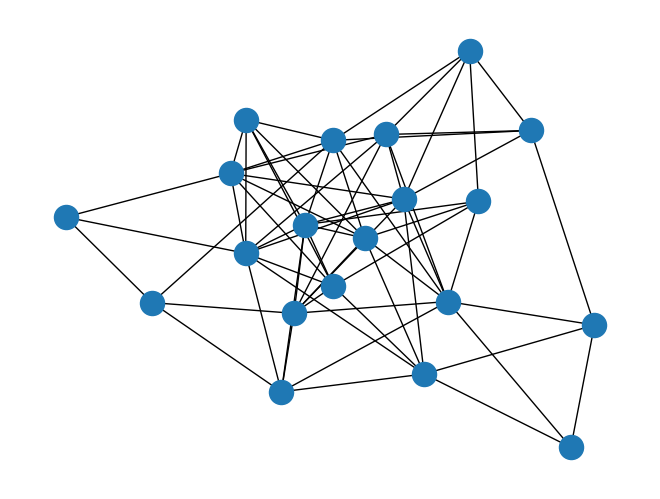

In [ ]:
import networkx as nx

# random network of Erdos-Renyi
G_er = nx.erdos_renyi_graph(20, 0.3)


betw_sequence = nx.betweenness_centrality(G_er) #returns dictionary
print(type(betw_sequence.values()))

print(betw_sequence)
nx.draw(G_er)
#nx.draw_networkx(G_er) #node_color = betw_sequence
plt.show()


# Local network measures analysis.
## Analysis of a network with local measures
We plot the distributions (sorted values of local measures) for `degree`, `clustering`, `betweenness` and other measures. Please use other setups for the plotting the histograms.

The networks are quite messy and full of links, therefore we perform some simple network analysis on them.
The structure of G can be analyzed using various graph-theoretic functions such as: linear ones (degree), non-linear ones (betweenness etc.)

# Plotting the distributions of network measures

We will need to check and plot distributions of networks.

As you remember from the previous lecture, we may want to plot degree in log log plot.

number of nodes 1000
number of edges 4975
<class 'list'>
5
141


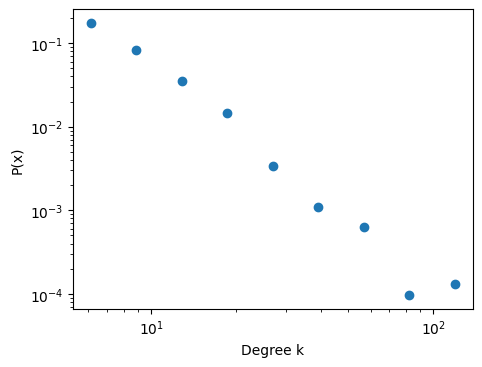

In [ ]:
# let us also look into the degree distribution of our network

G = nx.barabasi_albert_graph(1000, 5)
N = len(G)    # number of nodes
L = G.size()  # number of edges
print("number of nodes", N)
print("number of edges", L)


degrees = [d for _, d in G.degree()]

print(type(degrees))        # type tells u the class of degree which is a 'list' here

kmin = min(degrees)         # minimun degree of numbers
kmax = max(degrees)
print(kmin)
print(kmax)

fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

logbins = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
h, binedges = np.histogram(degrees,  bins=logbins, density=True) # We use np.histogram to make the binning calculations. Plotting is done with axes.plot below.
binmidpoints = (binedges[1:] + binedges[:-1]) / 2

axes.plot(binmidpoints, h, "o")
axes.set_xlabel("Degree k")
axes.set_ylabel("P(x)")
axes.set_xscale('log')
axes.set_yscale('log')


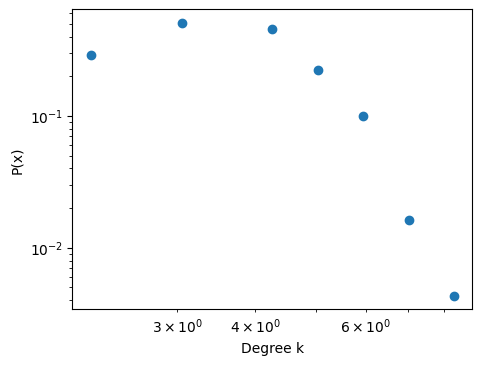

In [ ]:

# study degree distribution for other types of networks


G = nx.watts_strogatz_graph(1000, 5, 0.5)
N = len(G)
L = G.size()
degrees = [d for _, d in G.degree()]
kmin = min(degrees)
kmax = max(degrees)

fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

logbins = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
h, binedges = np.histogram(degrees,  bins=logbins, density=True) # We use np.histogram to make the binning calculations. Plotting is done with axes.plot below.
binmidpoints = (binedges[1:] + binedges[:-1]) / 2

axes.plot(binmidpoints, h, "o")
axes.set_xlabel("Degree k")
axes.set_ylabel("P(x)")
axes.set_xscale('log')
axes.set_yscale('log')


# Fitting the distribution

We also may need to fit the distribution to actually understand how well it is approximating by the power law dependency.

a: -1.9451783897239951
b: 3.4416652698460677


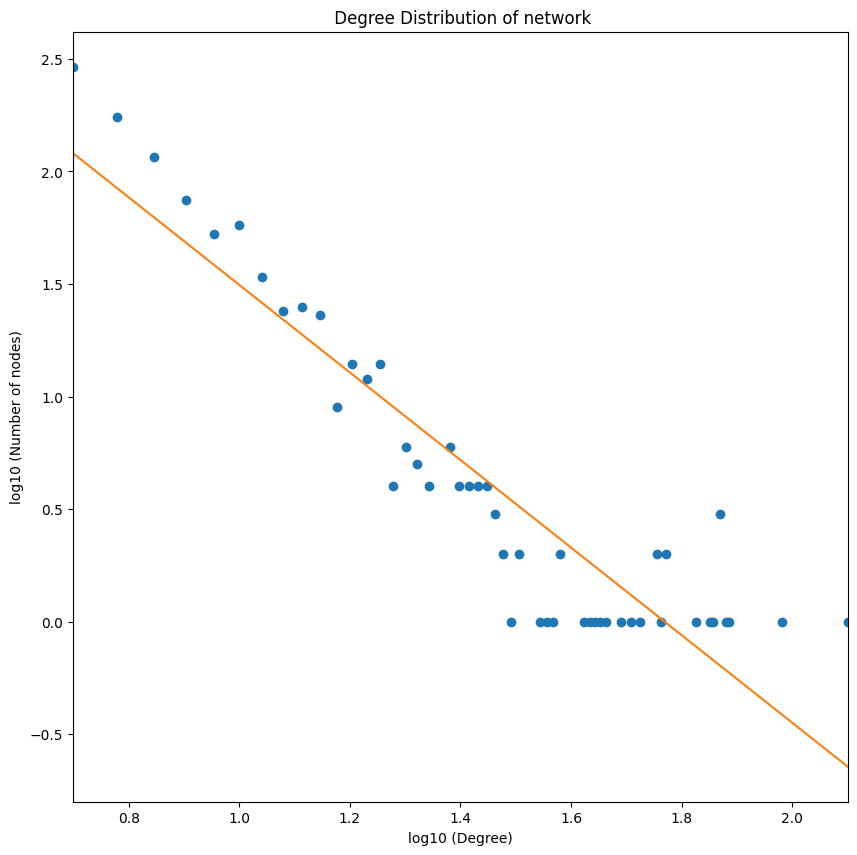

In [ ]:
from scipy.stats import linregress

# let us study the degree
# you can also study outdegree which may be the case if your network G is directed one

G = nx.barabasi_albert_graph(1000, 5)
out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)


a, b = np.polyfit(logx, logy, 1)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title(' Degree Distribution of network')
scatter_plot = plt.plot(logx, logy, 'o')
scatter_plot_regression = plt.plot(logx, a*logx + b)

print("a: " + str(a))
print("b: " + str(b))

Let us also plot distributions of other measures.

Make sure that you need to check for bins size for your distribution: e.g. in your code you will have

    seaborn.distplot(list(nx.degree_centrality(G).values()), bins=20)

where bins = 20 by default, but it may be more data pro bin.

Keep in mind:
Number of bins is square root of data size.

Since standard error should 'cover' and enough datapoints (according to Central limit theorem).

E.g. you can also estimate bins size before

    N_size = nx.nodes(G)
    bins = np.sqrt(N_size)

In [ ]:
import numpy as np
import seaborn


def measures_for_network(G, binsize):
    # -*- coding: utf-8 -*-
    #binsize =10
    #draws measures for your network G

    print('drawing measures for graph')
    plt.hist(list(nx.degree_centrality(G).values()))
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()

    seaborn.distplot(list(nx.degree_centrality(G).values()), bins=binsize)
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()

    #between_centrality =
    seaborn.distplot(list(nx.betweenness_centrality(G).values()), bins=binsize)#plt.hist(list(nx.betweenness_centrality(G).values()))
    plt.xlabel('betweenness')
    plt.ylabel('frequency')
    plt.show()



    seaborn.distplot(list(nx.clustering(G).values()), bins=binsize)
    plt.xlabel('clustering')
    plt.ylabel('frequency')
    plt.show()



    plt.hist(list(nx.closeness_centrality(G).values()))
    plt.xlabel('closeness')
    plt.ylabel('frequency')
    plt.show()

    print('calculating global measures')

    print('average neighbor degree', nx.average_degree_connectivity(G))

    print('average neighbor degree', nx.average_neighbor_degree(G))

    print('average clustering')
    avclus = nx.average_clustering(G)
    #print(avclus)



    components = nx.connected_components(G)
    #print('components', components)
    #[[1, 2, 3], ['spam']]


    nx.clustering(G)
    #{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}


    nx.degree(G)
    #Functions that return node properties return dictionaries keyed by node label. {1: 2, 2: 1, 3: 1, 'spam': 0}



# Calculate network measures for example networks

Which plots should be redone and how?

Keep in mind that for network measures we have seaborn library which makes the approximation of data in weird forms.


Either to use
```
sudo pip3 install python-louvain
```

https://stackoverflow.com/questions/53087066/how-to-use-the-communities-module-python-louvain-in-networkx-2-2

drawing measures for graph


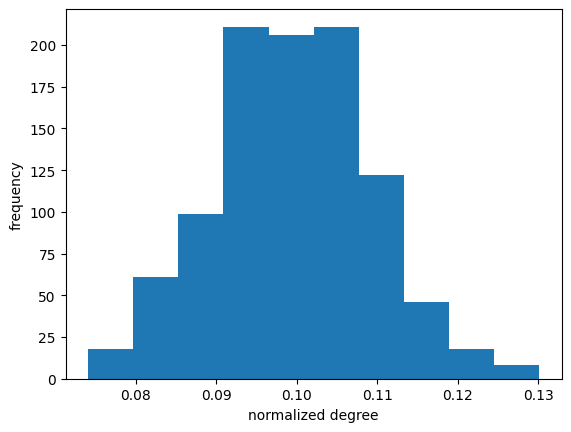

<ipython-input-13-501d23d489de>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(list(nx.degree_centrality(G).values()), bins=binsize)


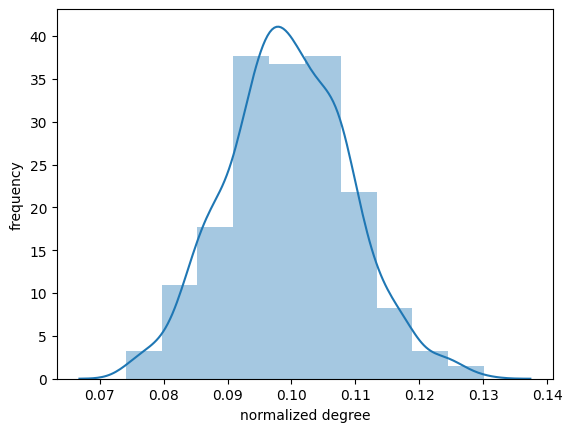

<ipython-input-13-501d23d489de>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(list(nx.betweenness_centrality(G).values()), bins=binsize)#plt.hist(list(nx.betweenness_centrality(G).values()))


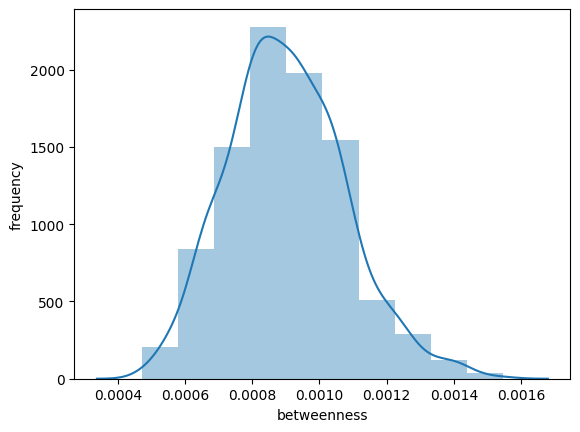

<ipython-input-13-501d23d489de>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(list(nx.clustering(G).values()), bins=binsize)


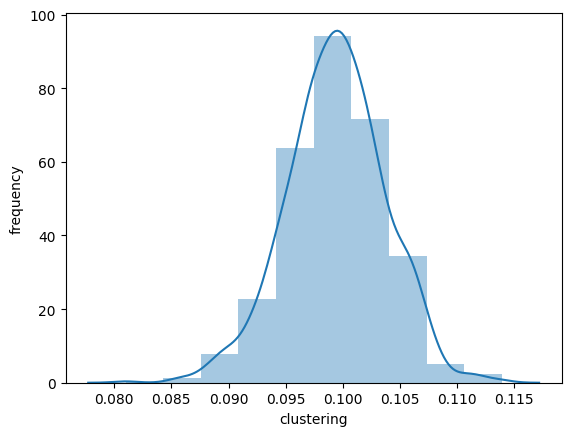

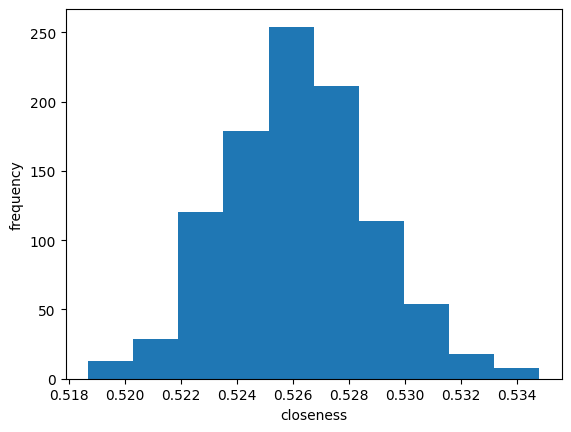

calculating global measures
average neighbor degree {105: 100.2225850340136, 94: 100.19512877939529, 104: 100.35285547785548, 93: 100.30168970814132, 96: 100.51916666666666, 110: 100.23737373737374, 106: 100.25880503144654, 97: 100.3103928670939, 123: 100.31165311653116, 109: 100.3278967040435, 84: 100.29636591478696, 86: 100.10912343470483, 85: 100.26209150326797, 103: 100.31161916692766, 102: 100.2218137254902, 117: 100.76223776223776, 107: 100.19581664441478, 101: 100.18198962753418, 91: 100.11217948717949, 87: 100.84243295019157, 88: 100.43968531468532, 114: 100.1116427432217, 100: 100.0255, 99: 100.32575757575758, 77: 99.23701298701299, 116: 99.98965517241379, 118: 100.10290556900726, 95: 100.29287925696595, 98: 100.15640074211503, 92: 100.28115942028985, 108: 100.22783389450056, 115: 100.12101449275362, 74: 101.94594594594595, 111: 100.61314255431903, 113: 100.11283185840708, 90: 100.13071895424837, 119: 100.39615846338535, 80: 100.73, 112: 100.34351503759399, 76: 100.17982456140

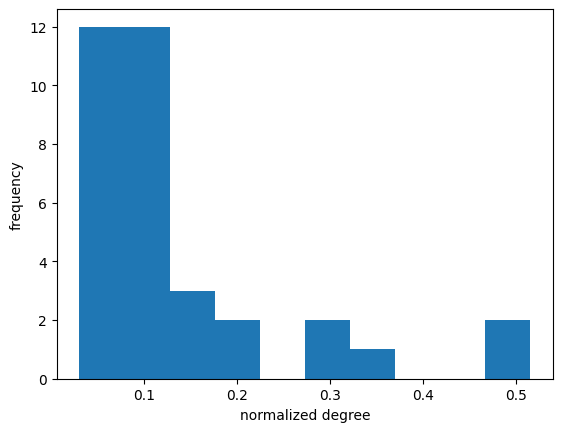

<ipython-input-13-501d23d489de>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(list(nx.degree_centrality(G).values()), bins=binsize)


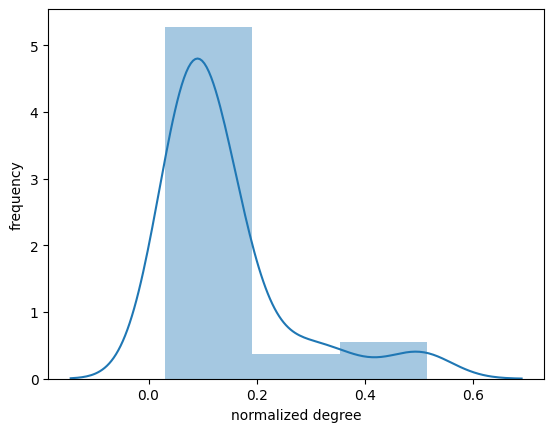

<ipython-input-13-501d23d489de>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(list(nx.betweenness_centrality(G).values()), bins=binsize)#plt.hist(list(nx.betweenness_centrality(G).values()))


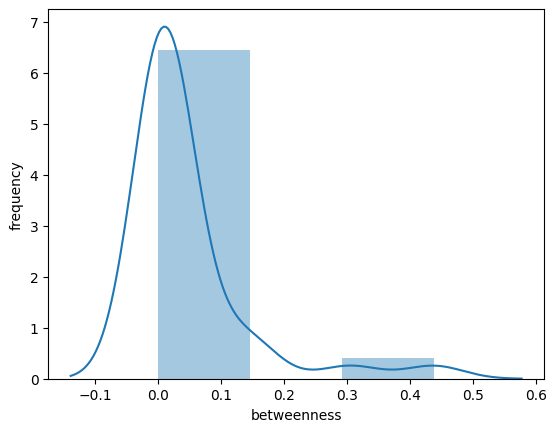

<ipython-input-13-501d23d489de>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(list(nx.clustering(G).values()), bins=binsize)


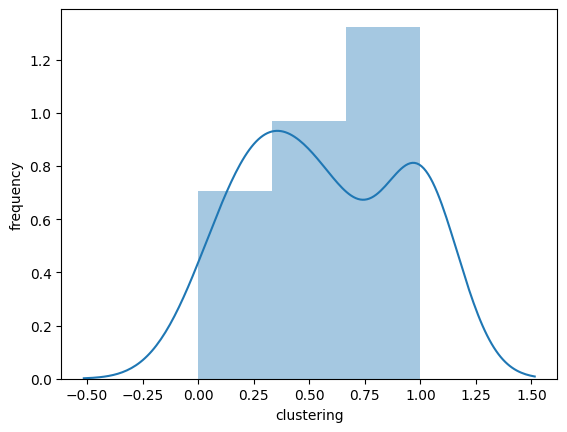

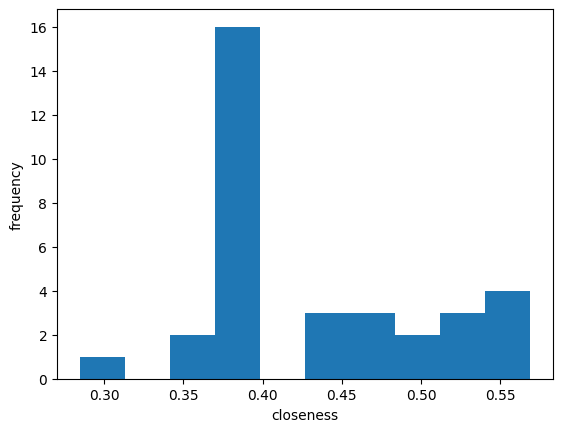

calculating global measures
average neighbor degree {16: 4.3125, 9: 5.777777777777778, 10: 6.6, 6: 8.333333333333334, 3: 8.222222222222221, 4: 8.541666666666666, 5: 10.466666666666667, 2: 12.409090909090908, 1: 16.0, 12: 5.083333333333333, 17: 3.823529411764706}
average neighbor degree {0: 4.3125, 1: 5.777777777777778, 2: 6.6, 3: 7.666666666666667, 4: 7.666666666666667, 5: 6.25, 6: 6.25, 7: 10.25, 8: 11.8, 9: 13.5, 10: 7.666666666666667, 11: 16.0, 12: 11.0, 13: 11.6, 14: 14.5, 15: 14.5, 16: 4.0, 17: 12.5, 18: 14.5, 19: 14.0, 20: 14.5, 21: 12.5, 22: 14.5, 23: 8.0, 24: 4.333333333333333, 25: 4.666666666666667, 26: 10.5, 27: 8.75, 28: 11.0, 29: 9.0, 30: 10.75, 31: 9.0, 32: 5.083333333333333, 33: 3.823529411764706}
average clustering


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.algorithms.community import greedy_modularity_communities


G = nx.erdos_renyi_graph(1000, 0.1)
binsize = 10
measures_for_network(G, binsize)

# generate some other network to compare your results with it
Gk = nx.karate_club_graph()
binsize = 3
measures_for_network(Gk, binsize)


# generate some other network to compare your results with it
n = 10
Gc = nx.complete_graph(n)

#measures_for_network(G)

# uncomment it when you want to look at degree distributions for other networks
#measures_for_network(Gc)




## Community structure

The function `greedy_modularity_communities(G, weight=None)[source]`
finds communities in graph using Clauset-Newman-Moore greedy modularity maximization. This method currently supports the Graph class and does not consider edge weights.

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

G = nx.karate_club_graph()
c = list(greedy_modularity_communities(G))
print('values in communities')
sorted(c[0])
print('nodes in 1st community', sorted(c[0]))
print('nodes in 2nd community', sorted(c[1]))

values in communities
nodes in 1st community [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
nodes in 2nd community [1, 2, 3, 7, 9, 12, 13, 17, 21]


# 3. Networks from data

Network generation process itself.


Quick guide of List comprehension:
`[` *output expression* `for` *iterator variable* `in` *iterable* `if` *predicate expression*`]`


In [ ]:
# prompt: open csv file as pandas dataframe

import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('quakers_nodelist.csv')

# Now you can work with the DataFrame 'df'
(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'quakers_nodelist.csv'

In [ ]:
# prompt: open csv file as pandas dataframe

import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
dfedg = pd.read_csv('quakers_edgelist.csv')

# Now you can work with the DataFrame 'dfedg'
(dfedg.head())


,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


[]

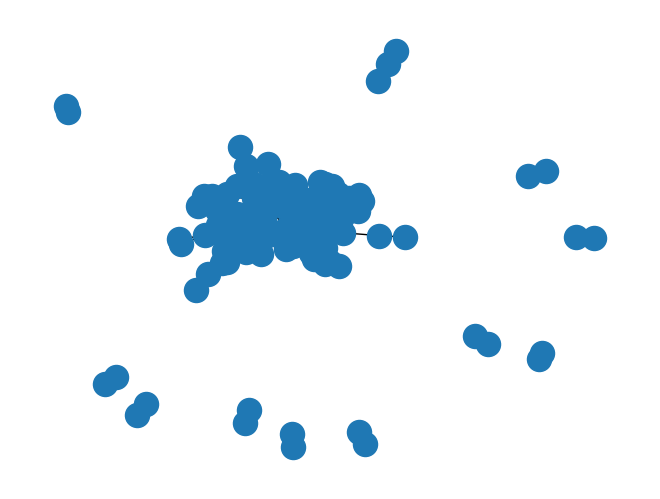

In [ ]:
import csv

with open('quakers_nodelist.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes]

with open('quakers_edgelist.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:] # the [1:] is only if first line is heading


# now let us use networkx
# graph creation of networkx object
G = nx.Graph()

G.add_nodes_from(node_names)
G.add_edges_from(edges)

nx.draw(G)
plt.plot()
#print(nx.info(G))

# Wohooo we have a networkx object!!

# what are node attributes?



In [ ]:
sex_dict = {}
age_dict = {}

for node in nodes:
    sex_dict[node[0]] = node[1]
    age_dict[node[0]] = node[2]
    print( sex_dict[node[0]])

nx.set_node_attributes(G, sex_dict, 'Bender')
nx.set_node_attributes(G, age_dict, 'Birthdate')

religious writer
local politician and author
colonial official and scholar
Quaker preacher
Quaker preacher and poet
religious writer
Quaker preacher and writer
Quaker activist
Quaker preacher
Quaker minister and schoolmaster
printer
philosophical writer and playwright
political economist and cloth merchant
Quaker preacher
religious writer
a founder of the Religious Society of Friends (Quakers)
Quaker minister
Quaker preacher
Quaker preacher
Quaker preacher and writer
Quaker missionary
Quaker minister
Quaker activist
Quaker activist and physician
Quaker leader
Quaker activist and writer
merchant and pioneer settler in America
Quaker missionary
banker and lobbyist
politician
Quaker patron and merchant
religious controversialist
Quaker leader and writer
Quaker activist
Quaker administrator
historian of Quakerism
Quaker preacher and writer
Quaker preacher
Quaker leader and writer
Quaker minister and preacher
Quaker leader and writer
merchant and religious writer
apothecary
Quaker adherent 

Plotting network with attributes and why it does not look good?

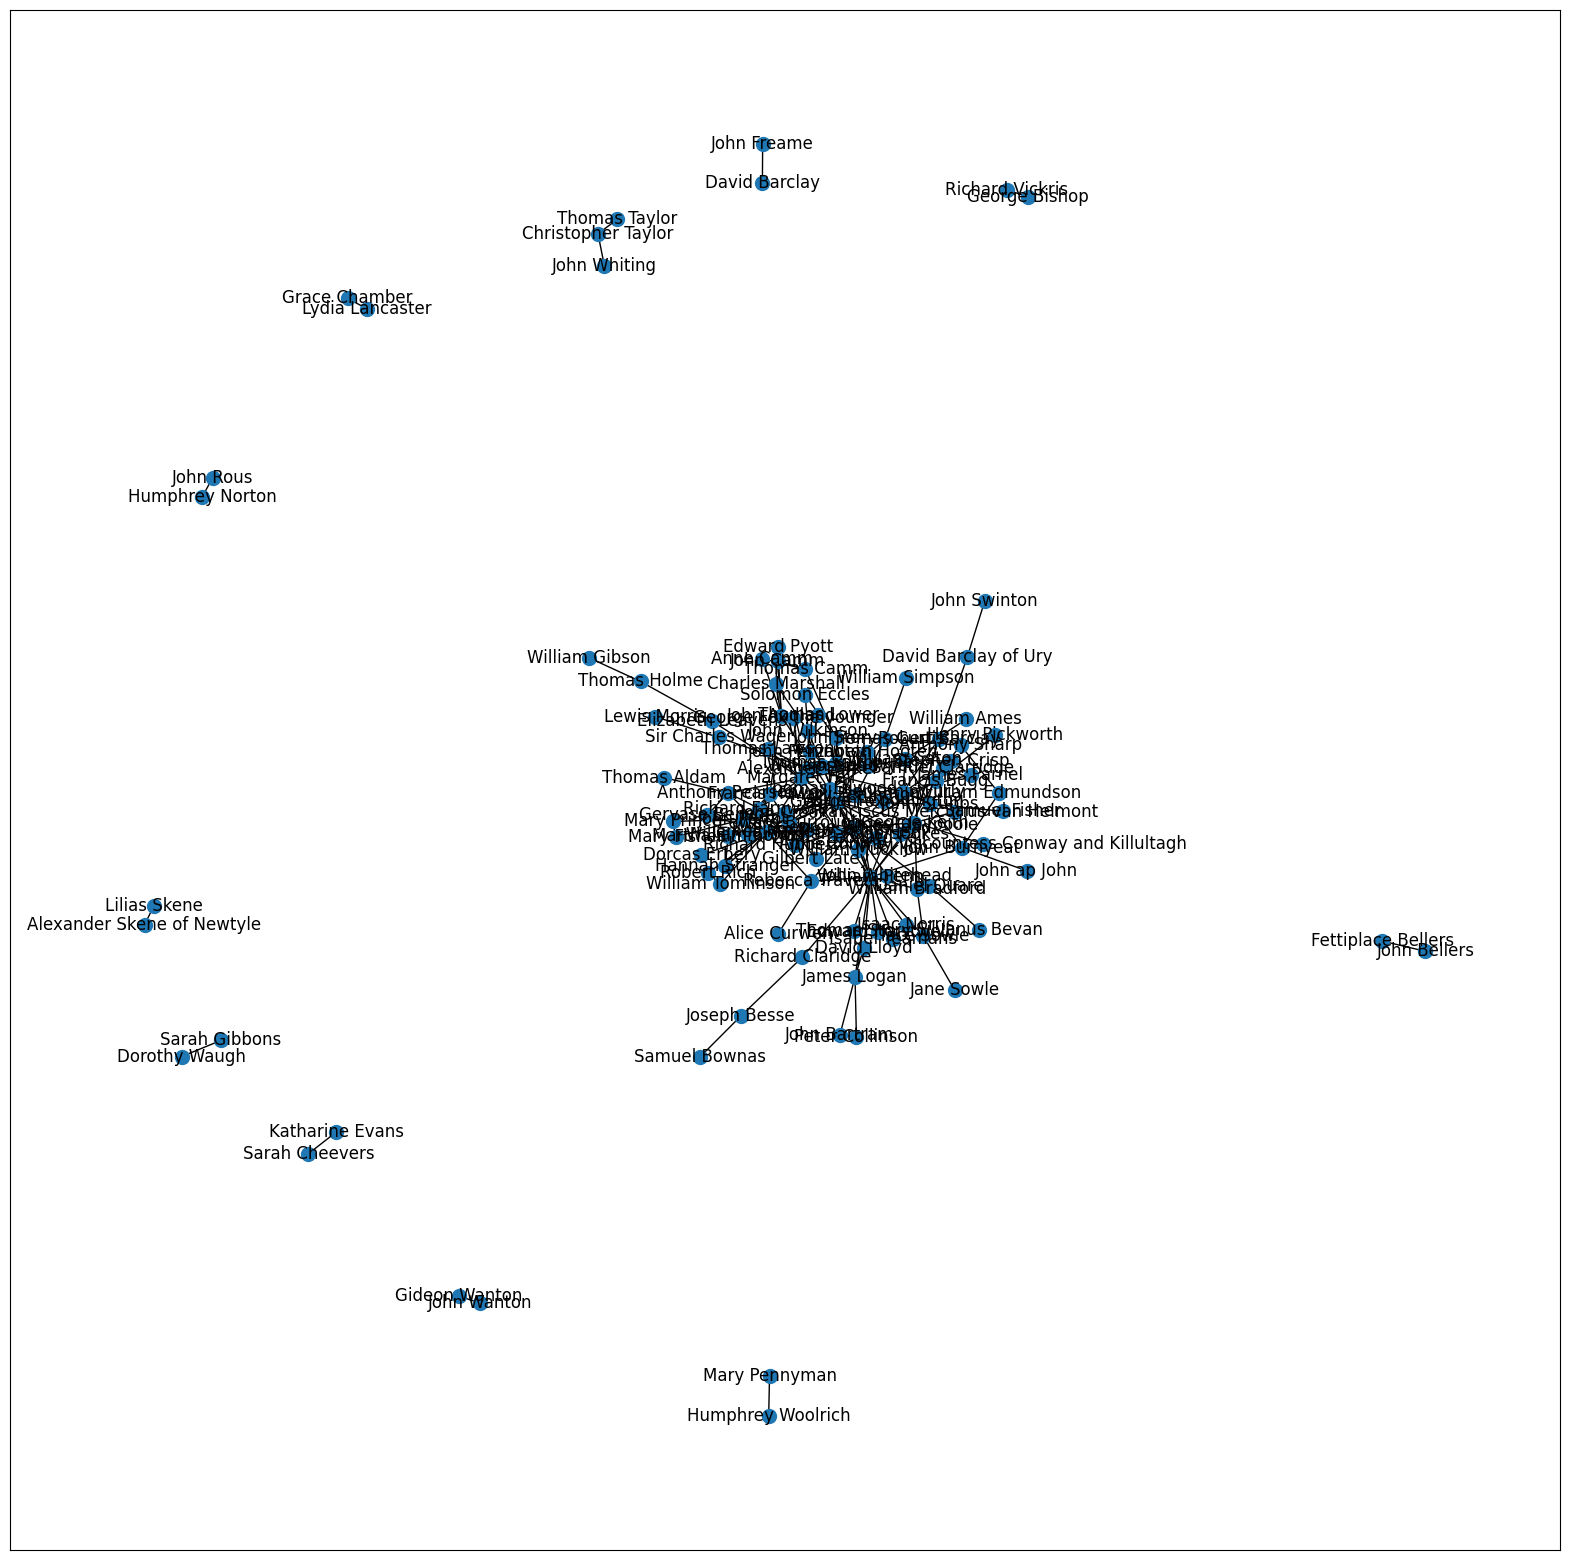

In [ ]:
# one could draw other types of networks as this one, you can also try your network out
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))  # Adjust width and height as needed

nx.draw_networkx(G, node_size=100)


This is just the example of illustration of how networks may look like saved from last time, so no need to run it.



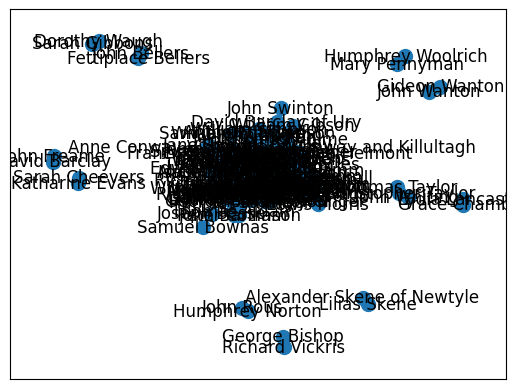

In [ ]:
# one could draw other types of networks as this one, you can also try your network out
nx.draw_networkx(G, node_size=100)

In [ ]:
'''
color_map = []
for n in G.nodes():
    if G.nodes[n]['sex'] == 'Female':
        color_map.append('blue')
    else:
        color_map.append('green')

nx.draw_networkx(G, node_size=1500, node_color=color_map, font_color='white')
'''

"\ncolor_map = []\nfor n in G.nodes():\n    if G.nodes[n]['sex'] == 'Female':\n        color_map.append('blue')\n    else:\n        color_map.append('green')\n\nnx.draw_networkx(G, node_size=1500, node_color=color_map, font_color='white')\n"

In [ ]:
print(nx.density(G))
print(nx.shortest_path(G, source="Kelly", target="John"))
print(nx.diameter(G)) #the longest of all shortest paths
print(nx.transitivity(G))
G.degree()


0.00995995995995996


NodeNotFound: Either source Kelly or target John is not in G

# Test yourself

Make the same analysis with quarker network
(see in files)

Read network elsehow (see other notebook)

Make analysis of highschool students
 https://networks.skewed.de/net/highschool

In [ ]:
node_csv = open('quakers_nodelist.csv', 'r') # opens the file

node_reader = csv.reader(node_csv) # reads the csv

# The csv readers don't support indexing. The value returned is not a list, it is an iterator over the rows. To make them a list:

nodes = []
for row in node_reader:
    nodes.append(row)

node_csv.close() # It is important to close all files we open to save memory. It is good coding practice.


print(nodes[0:3]) # Problem: first item in the list is not data, it is a header.


Load edgelist and nodelist

In [ ]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
%matplotlib inline


with open('quakers_nodelist.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes]

with open('quakers_edgelist.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:] # the [1:] is only if first line is heading


#graph creation of networkx object
G = nx.Graph()

G.add_nodes_from(node_names)
G.add_edges_from(edges)

nx.draw(G)
plt.plot()
#print(nx.info(G))


# Network types
## How to encode different types of networks for computer?

How to encode some more information which we want to include into our network?

E.g. bipartite networks, or layed networks? How to represent a network with two types of nodes, e.g. nodes with two types of labels: label A and label B.

Try it yourself in the notebook.
Use tutorial if you need assistance from networkx https://networkx.org/documentation/stable/tutorial.html


In [ ]:


# one example of such graph is di-graph - directional graph with specific order

DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]



# Processes on networks

For future classes reading

    [1] Temporal networks, Saramaki, Holme, https://arxiv.org/abs/1108.1780
    [2] Spreading in networks, Vespigniani, et al. https://arxiv.org/abs/1408.2701